# DMIA Industry hw0
Until 16-02-2018.
[Submit](https://docs.google.com/forms/d/e/1FAIpQLSei__haliKHAoK05k3OX-tmZdRGmgXZM2fEozr0eSSjAwcpVQ/viewform)

### Задача 1

`0.9648`

Что выведет этот код?

Ответом на эту задачу является выведенное число, округлённое до 4го знака, дробная часть отделяется **точкой**.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [3]:
RANDOM_SEED = 42

In [4]:
X_data, y_data = load_breast_cancer(return_X_y=True)

model = RandomForestClassifier(criterion='entropy', n_estimators=42, 
                               random_state=RANDOM_SEED)
cross_val_score(model, X_data, y_data, cv=3).mean()

0.9648473034437947

### Задача 2
`0.9688`

Напишите свою функцию определения качества модели по следующей метрике: максимальный precision, при условии, что $precision < 1.5 * recall$ и $recall > 0.5$ и определите наилучшее её значение, перебирая гиперпараметры по предложенной сетке

Ответом на эту задачу является максимальное значение качества по предложенной метрике, округлённое до 4го знака, дробная часть отделяется **точкой**.

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

In [6]:
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [None, 5, 10, 15, 20],
    'criterion': ['entropy', 'gini']
}

X_data, y_data = load_breast_cancer(return_X_y=True)

estimator = RandomForestClassifier(random_state=42)

In [7]:
print('Accuracy best params and score')
result = GridSearchCV(estimator, param_grid, cv=3, scoring='accuracy').fit(X_data, y_data)
print('\tParams:', result.best_params_)
print('\tScore:', result.best_score_)

Accuracy best params and score
	Params: {'criterion': 'entropy', 'n_estimators': 50, 'max_depth': None}
	Score: 0.9648506151142355


In [44]:
def custom_scorrer(y_true, y_pred, rec_treshold=0.5, prec_treshold=1.5):
    rec = recall_score(y_true, y_pred)
    if rec > rec_treshold:
        prec = precision_score(y_true, y_pred)
        return prec if prec < prec_treshold * rec else -1
    return -1

In [45]:
scorer = make_scorer(custom_scorrer)

print('Custom loss best params and score')
result = GridSearchCV(estimator, param_grid, cv=3, scoring=scorer).fit(X_data, y_data)
print('\tParams:', result.best_params_)
print('\tScore:', result.best_score_)

Custom loss best params and score
	Params: {'criterion': 'gini', 'n_estimators': 10, 'max_depth': None}
	Score: 0.9688196110664571


### Задача 3
`29.57`

Какова минимальная сторона квадрата с параллельными осям сторонами, содержащего все точки из $X$? 

Ответом на эту задачу является число, округлённое до 2го знака, дробная часть отделяется точкой.

In [38]:
from sklearn.datasets import load_breast_cancer
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

In [9]:
data = load_breast_cancer()
X = data.data[:, :2]

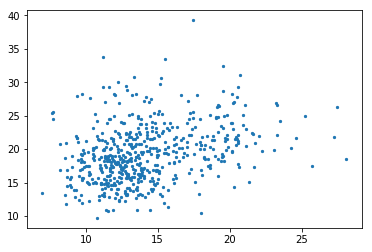

In [28]:
_ = plt.scatter(X[:, 0], X[:, 1], s=5)

In [37]:
x_a, x_b = min(X[:, 0]), max(X[:, 0])
y_a, y_b = min(X[:, 1]), max(X[:, 1])
r_x = abs(x_b - x_a)
r_y = abs(y_b - y_a)
print(x_a, x_b, y_a, y_b)
print(r_x, r_y)

6.981 28.11 9.71 39.28
21.128999999999998 29.57


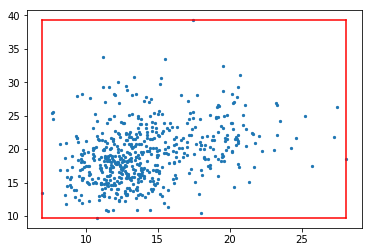

In [36]:
_ = plt.scatter(X[:, 0], X[:, 1], s=5)
_ = plt.plot(np.linspace(x_a, x_b, 100), [y_a for _ in range(100)], c='r')
_ = plt.plot(np.linspace(x_a, x_b, 100), [y_b for _ in range(100)], c='r')
_ = plt.plot([x_a for _ in range(100)], np.linspace(y_a, y_b, 100), c='r')
_ = plt.plot([x_b for _ in range(100)], np.linspace(y_a, y_b, 100), c='r')